In [236]:
import numpy as np
import pandas as pd
import random as rdm
import numpy.matlib as nmpmatlib
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, MaxPooling1D, Activation
from keras.utils.np_utils import to_categorical
from sklearn.utils import validation

## Pre-Processing Data
Membaca dataset dari URL ke collab

In [237]:
datasetURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
df = pd.read_csv(datasetURL, delimiter=",", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


Menampilkan data asli dari arrythmia data

In [238]:
df_arrythmia = pd.read_excel('Data.xlsx')
df_arrythmia

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


Menampilkan data "class" yang akan digunakan untuk proses data


In [239]:
df_arrythmia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


Menampilkan Boxplot dari persebaran data arrythmia

In [240]:
'''
def boxplot(df_arrythmia):
    sns.set(rc={'figure.figsize':(30,9)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df_arrythmia[df_arrythmia.columns]))

    plt.show()

boxplot(df_arrythmia)
'''

'\ndef boxplot(df_arrythmia):\n    sns.set(rc={\'figure.figsize\':(30,9)})\n    sns.boxplot(x="variable", y="value", data=pd.melt(df_arrythmia[df_arrythmia.columns]))\n\n    plt.show()\n\nboxplot(df_arrythmia)\n'

*   Mengecek banyaknya missing value yang ada di arrythmia.data

In [241]:
print("Banyaknya missing value dalam data arrythmia : ",df_arrythmia.isnull().sum().sum())

Banyaknya missing value dalam data arrythmia :  408


*   Mengecek banyaknya data yang duplikat

In [242]:
print("Banyaknya data yang duplikat : ", df_arrythmia.duplicated().sum())

Banyaknya data yang duplikat :  0


In [243]:
df_arrythmia_data = df.iloc[:,:-1]
df_arrythmia_class = df.iloc[:,-1]
df_arrythmia_class

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: 279, Length: 452, dtype: int64

**Data Cleaning & Processing**

---


Yakni data dari data kosong "?" diubah dan diganti dengan nilai median,kemudian menghapus salah satu kolom tersebut. serta membuat normalisasi data dari metode scaling yang nantinya data tersebut akan dimasukkan ke splitting data dan menjadi data test dan data train

In [244]:
#Mengganti nilai kosong menjadi nilai median
df_arrythmia_data = df_arrythmia_data.replace('?', np.NaN)
thresh = len(df_arrythmia_data) * 0.35
df_arrythmia_data.dropna(thresh = thresh,axis=1,inplace=True)

df_arrythmia_data = df_arrythmia_data.fillna(df_arrythmia_data.median())

dataScaler = StandardScaler()
df_scale = dataScaler.fit_transform(df_arrythmia_data.values)
df_arrythmia_data = pd.DataFrame(df_scale, index = df_arrythmia_data.index)

print("Data yang sudah diproses : ", df_arrythmia_data.shape)

Data yang sudah diproses :  (452, 278)


Membuat encoder data class

Yakni mengubah bentuk dari data "class" menjadi Bentuk kategorikal agar bisa membuat pemodelan datanya semakin baik.

In [245]:
l_encode = LabelEncoder()
l_encode.fit(df_arrythmia_class)
df_arrythmia_class = l_encode.transform(df_arrythmia_class)
df_arrythmia_class = to_categorical(df_arrythmia_class)
print("Class Data")
df_arrythmia_class

Class Data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [246]:
'''
def boxplot(df_arrythmia_data):
    sns.set(rc={'figure.figsize':(30,9)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df_arrythmia_data[df_arrythmia_data.columns]))

    plt.show()

boxplot(df_arrythmia_data)
'''

'\ndef boxplot(df_arrythmia_data):\n    sns.set(rc={\'figure.figsize\':(30,9)})\n    sns.boxplot(x="variable", y="value", data=pd.melt(df_arrythmia_data[df_arrythmia_data.columns]))\n\n    plt.show()\n\nboxplot(df_arrythmia_data)\n'

### SPLIT DATA

Misahin datanya buat data training dan data testing

In [247]:
x_Train, x_Test, y_Train, y_Test = train_test_split(df_arrythmia_data, df_arrythmia_class, test_size=0.30, random_state=5)
print(x_Train.shape, y_Train.shape, x_Test.shape, y_Test.shape)

(316, 278) (316, 13) (136, 278) (136, 13)


## MULAI PEMODELAN DATA
Uji dengan memakai ANN

In [248]:
#Kalo pake units, dalam model yang dibuat, berarti dia punya 28 neuron dalam ANN
#input_dim menggambarkan berapa banyak column dimensi yang ada di dalam data
model = Sequential()
model.add(Dense(8, input_dim = 278, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(13, activation = 'softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 8)                 2232      
                                                                 
 dense_68 (Dense)            (None, 256)               2304      
                                                                 
 dense_69 (Dense)            (None, 128)               32896     
                                                                 
 dense_70 (Dense)            (None, 13)                1677      
                                                                 
Total params: 39,109
Trainable params: 39,109
Non-trainable params: 0
_________________________________________________________________


## Compile Model dari data Training

Modelling data serta compile data dari data train yang sudah di processing

In [249]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
md_result = model.fit(x_Train, y_Train, epochs = 80, batch_size=16)
#Epoch ini digunakan untuk iterasi data training model
#batch size ini membagi berapa data dari data set untuk dimodelkan secara bertahap

Epoch 1/80
20/20 [==============================] - 0s 2ms/step - loss: 2.1095 - accuracy: 0.5190
Epoch 2/80
20/20 [==============================] - 0s 2ms/step - loss: 1.6493 - accuracy: 0.5538
Epoch 3/80
20/20 [==============================] - 0s 3ms/step - loss: 1.4300 - accuracy: 0.5696
Epoch 4/80
20/20 [==============================] - 0s 2ms/step - loss: 1.2806 - accuracy: 0.6203
Epoch 5/80
20/20 [==============================] - 0s 2ms/step - loss: 1.1369 - accuracy: 0.6456
Epoch 6/80
20/20 [==============================] - 0s 2ms/step - loss: 1.0196 - accuracy: 0.6709
Epoch 7/80
20/20 [==============================] - 0s 2ms/step - loss: 0.9082 - accuracy: 0.7184
Epoch 8/80
20/20 [==============================] - 0s 2ms/step - loss: 0.7941 - accuracy: 0.7468
Epoch 9/80
20/20 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.7658
Epoch 10/80
20/20 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7911
Epoch 11/80
20/20 [

Visualisasi dari modelling data yang dibuat sebelumnya

<function matplotlib.pyplot.show(*args, **kw)>

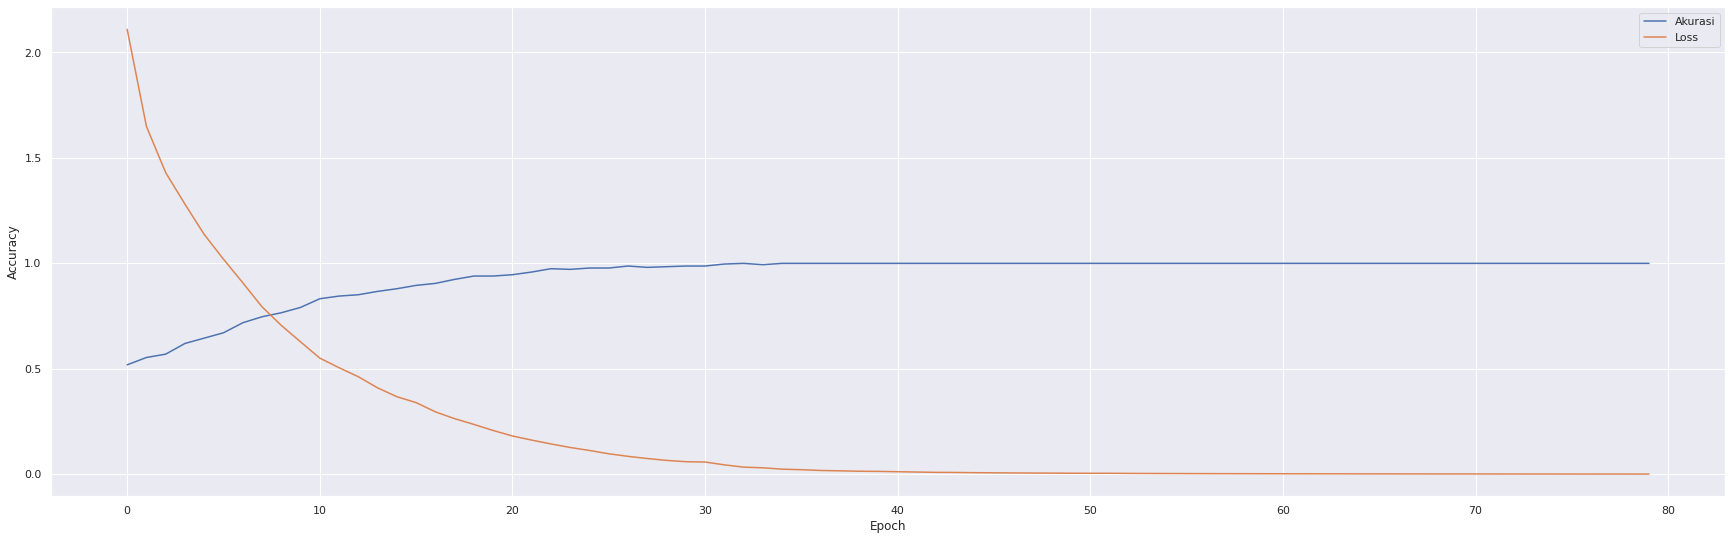

In [250]:
plt.plot(md_result.history['accuracy'],label = "Akurasi",linestyle="solid")
plt.plot(md_result.history['loss'],label = "Loss", linestyle="solid")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show

Hasil Evaluasi data dari data train

In [251]:
print("Evaluasi data ")
results = model.evaluate(x_Train, y_Train, batch_size=16)
print(results)

Evaluasi data 
20/20 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
[0.0011389360297471285, 1.0]


## Compile Model dengan Data Test

Modelling data serta compile data dari data test yang sudah diprocessing

In [252]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
md_TestResult = model.fit(x_Test, y_Test, epochs = 80, batch_size=16)

Epoch 1/80
9/9 [==============================] - 0s 3ms/step - loss: 5.7633 - accuracy: 0.5000
Epoch 2/80
9/9 [==============================] - 0s 3ms/step - loss: 3.8251 - accuracy: 0.5441
Epoch 3/80
9/9 [==============================] - 0s 2ms/step - loss: 2.9187 - accuracy: 0.5735
Epoch 4/80
9/9 [==============================] - 0s 2ms/step - loss: 2.2674 - accuracy: 0.5588
Epoch 5/80
9/9 [==============================] - 0s 2ms/step - loss: 1.8128 - accuracy: 0.6324
Epoch 6/80
9/9 [==============================] - 0s 2ms/step - loss: 1.5082 - accuracy: 0.6324
Epoch 7/80
9/9 [==============================] - 0s 4ms/step - loss: 1.2550 - accuracy: 0.6838
Epoch 8/80
9/9 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.7353
Epoch 9/80
9/9 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy: 0.7426
Epoch 10/80
9/9 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.8015
Epoch 11/80
9/9 [======================

Visualisasi dari modelling data yang dibuat sebelumnya

<function matplotlib.pyplot.show(*args, **kw)>

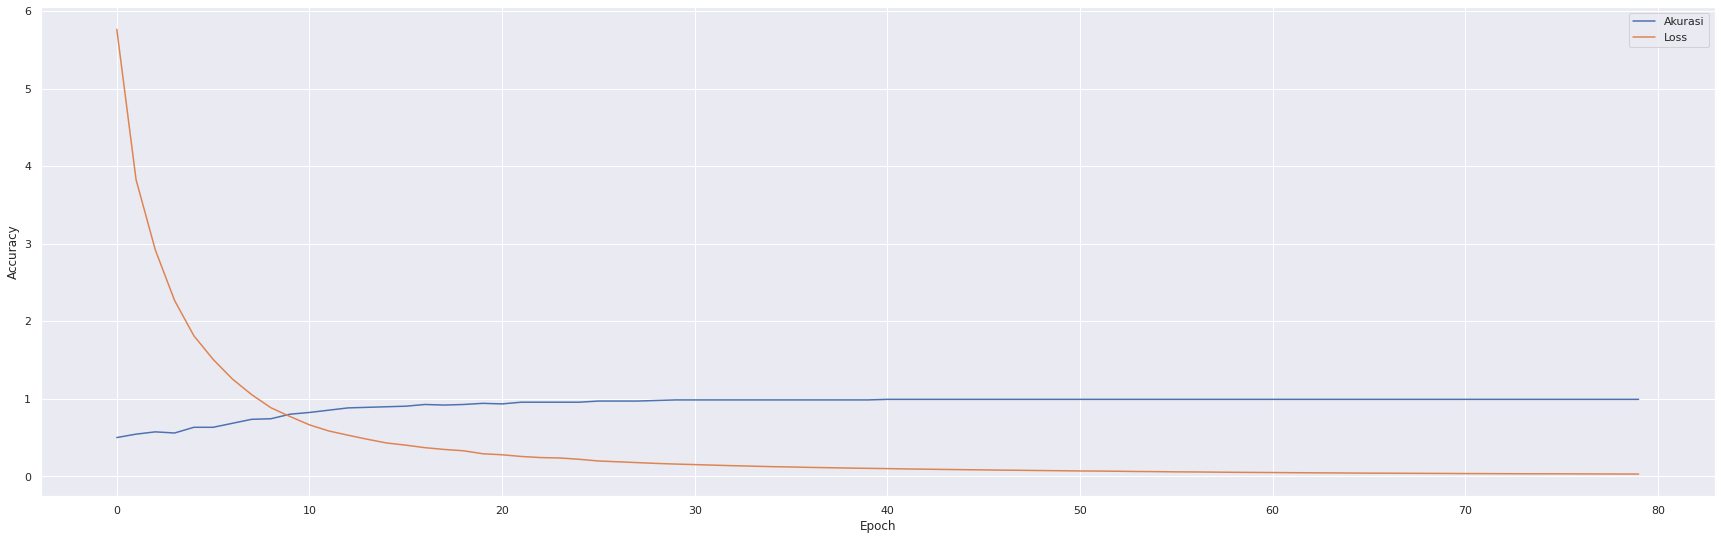

In [253]:
plt.plot(md_TestResult.history['accuracy'],label = "Akurasi",linestyle="solid")
plt.plot(md_TestResult.history['loss'],label = "Loss", linestyle="solid")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show

Hasil Evaluasi data dari data Test

In [254]:
print("Evaluasi data ")
results_Test = model.evaluate(x_Test, y_Test, batch_size=16)
print(results_Test)

Evaluasi data 
9/9 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9926
[0.028665781021118164, 0.9926470518112183]
